In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

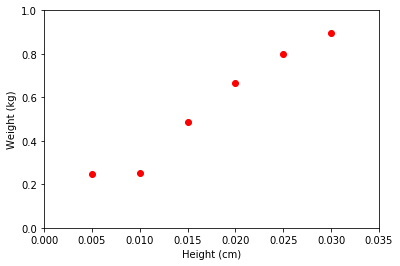

In [3]:
# height (cm)
X = np.array([[0.005, 0.010, 0.015, 0.020, 0.025, 0.030]]).T
# weight (kg)
# y = np.array([[0.3277743887591704 ,
# 0.3911574423906424 ,
# 0.5382781378774741 ,
# 0.6107028850801685 ,
# 0.6809127732084159 ,
# 0.7639955547233397]]).T
y = np.array([[0.24943,
0.25338,
0.48598,
0.66807,
0.79758,
0.89744,]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([0, 0.035, 0, 1])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[ 0.05317267]
 [28.88422857]]
[0.005      0.00777778 0.01055556 0.01333333 0.01611111 0.01888889
 0.02166667 0.02444444 0.02722222 0.03      ]
[0.19759381 0.27782778 0.35806175 0.43829571 0.51852968 0.59876365
 0.67899762 0.75923159 0.83946556 0.91969952]


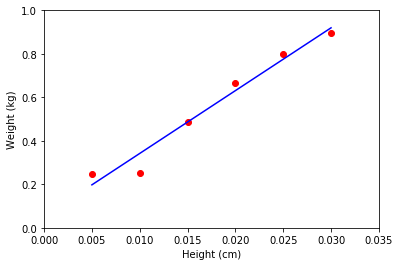

In [4]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(5, 30, 10)/1000
print(x0)
y0 = w_0 + w_1*x0
print(y0)
# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'b')               # the fitting line
plt.axis([0, 0.035, 0, 1])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [5]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 4477.11 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 4621.53 (kg), real number: 56 (kg)


In [6]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[ 0.05317267 28.88422857]]
Solution found by (5):  [[ 0.05317267 28.88422857]]


In [7]:
print(regr.coef_[0][1])

28.884228571428583


In [8]:
from sklearn.metrics import r2_score
y_pred = w_0 + w_1*X
print(y_pred)
print(y)
r2_score(y, y_pred)

[[0.19759381]
 [0.34201495]
 [0.4864361 ]
 [0.63085724]
 [0.77527838]
 [0.91969952]]
[[0.24943]
 [0.25338]
 [0.48598]
 [0.66807]
 [0.79758]
 [0.89744]]


0.9658108484244331

Solution found by scikit-learn  :  [[-3.44000000e-02  4.84514286e+01]]


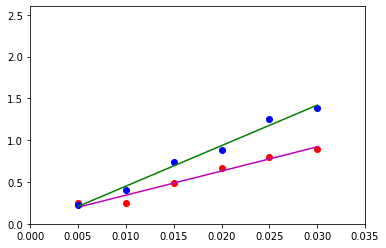

R2:  0.9865175887502584
Solution found by UV-VIS:  48.451428571428586
R2:  0.9658108484244331
Solution found by Smartphone:  [28.88422857]


In [9]:
ynew = np.array([[0.229,
0.403,
0.734,
0.877,
1.25,
1.388,
]]).T
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, ynew)
print( 'Solution found by scikit-learn  : ', regr.coef_ )
ynew_pred = regr.coef_[0][0] + regr.coef_[0][1]*X
yn = regr.coef_[0][0] + regr.coef_[0][1]*x0

plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'm')               # the fitting line
plt.plot(X.T, ynew.T, 'bo')
plt.plot(x0, yn, 'g')   
plt.axis([0, 0.035, 0, 2.6])
plt.show()
print('R2: ',r2_score(ynew, ynew_pred))
print( 'Solution found by UV-VIS: ', regr.coef_[0][1])
print('R2: ',r2_score(y, y_pred))
print( 'Solution found by Smartphone: ', w[1].T)

In [27]:
80.67/26.64

3.0281531531531534